# Election Statis

$H_0$: There is no relationship between campaign funding and winning

$H_1$: There is a relationship between campaign funding and winning

I suspect there is no relationship anymore, and that it would be a negative relationship if you look at only recent data.

In [118]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare
import seaborn as sns

In [150]:
# Inflation data from here, starting in Jan for each year https://www.bls.gov/data/inflation_calculator.htm

elfd = pd.DataFrame(
    {"Republican" : [1452617443, 1087909269, 433392727, 628140123,  701469440, 367228819],
     "Democrat"   : [2001292139, 1624301628, 769879088, 813649144, 1474505205, 328479256],
     "Inflation"  : [         1,       1.20,      1.30,      1.36,       1.46,      1.67], # 1.83 for 2000
     "Dem_votes"  : [       226,        306,       227,       332,        365,       251],
     "Rep_votes"  : [       312,        232,       304,       206,        173,       286]},
      index =             [2024,       2020,      2016,      2012,       2008,      2004]
)

elfd["spend_diff"] = elfd["Democrat"] - elfd["Republican"]
elfd["vote_diff"] = elfd["Dem_votes"] - elfd["Rep_votes"]

# 1 == win, 0 == loss
elfd["Democrat_pred_win"] = np.where(elfd["Democrat"] > elfd["Republican"], 1, 0)
elfd["Democrat_act_win"]  = np.where(elfd["Dem_votes"] > elfd["Rep_votes"], 1, 0)

elfd

,Republican,Democrat,Inflation,Dem_votes,Rep_votes,spend_diff,vote_diff,Democrat_pred_win,Democrat_act_win
2024,1452617443,2001292139,1.00,226,312,548674696,-86,1,0
2020,1087909269,1624301628,1.20,306,232,536392359,74,1,1
2016,433392727,769879088,1.30,227,304,336486361,-77,1,0
2012,628140123,813649144,1.36,332,206,185509021,126,1,1
2008,701469440,1474505205,1.46,365,173,773035765,192,1,1
2004,367228819,328479256,1.67,251,286,-38749563,-35,0,0


        Party      Funding Democrat_act_win  Year
0  Republican  1452.617443              win  2024
1  Republican  1087.909269             loss  2020
2  Republican   433.392727              win  2016
3  Republican   628.140123             loss  2012
4  Republican   701.469440             loss  2008


Text(0.5, 0.98, 'Republican and Democrat Win/Loss per Spending')

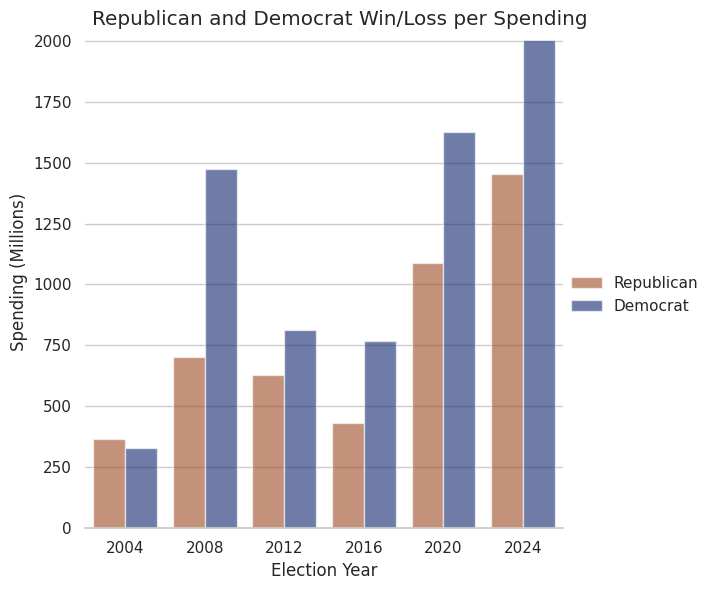

In [138]:
ndf = pd.melt(elfd).head(12).rename(columns={"variable": "Party"}).rename(columns={"value": "Funding"})
ndf["Funding"] = ndf["Funding"] / 1000000 # In millions now
ndf["Democrat_act_win"] = [0,1,0,1,1,0,0,1,0,1,1,0]
ndf["Democrat_act_win"] = np.where(ndf["Democrat_act_win"] == 0, "win", "loss")
ndf["Year"] = [2024, 2020, 2016, 2012, 2008, 2004, 2024, 2020, 2016, 2012, 2008, 2004]

print(ndf.head(5))

sns.set_theme(style="whitegrid")
reversed_palette = sns.color_palette("dark", 2)[::-1]

g = sns.catplot(
    data=ndf, kind="bar",
    x="Year", y="Funding", hue="Party",
    errorbar="sd", palette=reversed_palette, alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Election Year", "Spending (Millions)")
g.legend.set_title("")
g.fig.suptitle("Republican and Democrat Win/Loss per Spending")

        Party      Funding Democrat_act_win  Year  Inflation
0  Republican  1452.617443              win  2024       1.00
1  Republican  1305.491123             loss  2020       1.20
2  Republican   563.410545              win  2016       1.30
3  Republican   854.270567             loss  2012       1.36
4  Republican  1024.145382             loss  2008       1.46


Text(0.5, 0.98, 'Republican and Democrat Win/Loss per Spending')

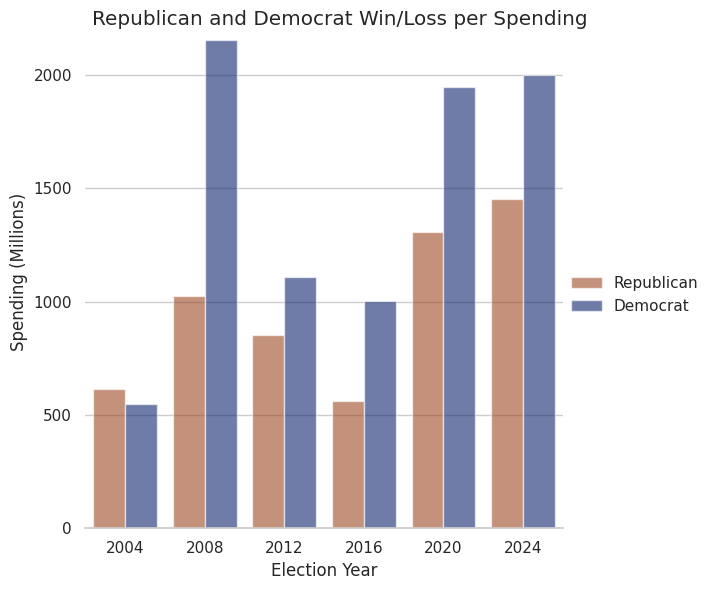

In [139]:
ndf = pd.melt(elfd).head(12).rename(columns={"variable": "Party"}).rename(columns={"value": "Funding"})
ndf["Democrat_act_win"] = [0,1,0,1,1,0,0,1,0,1,1,0]
ndf["Democrat_act_win"] = np.where(ndf["Democrat_act_win"] == 0, "win", "loss")
ndf["Year"] = [2024, 2020, 2016, 2012, 2008, 2004, 2024, 2020, 2016, 2012, 2008, 2004]
ndf["Inflation"] = [1, 1.20, 1.30, 1.36, 1.46, 1.67, 1, 1.20, 1.30, 1.36, 1.46, 1.67]
ndf["Funding"] = ndf["Funding"] / 1000000 # In millions now
ndf["Funding"] = ndf["Funding"] * ndf["Inflation"]

print(ndf.head(5))

sns.set_theme(style="whitegrid")
reversed_palette = sns.color_palette("dark", 2)[::-1]

g = sns.catplot(
    data=ndf, kind="bar",
    x="Year", y="Funding", hue="Party",
    errorbar="sd", palette=reversed_palette, alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Election Year", "Spending (Millions)")
g.legend.set_title("")
g.fig.suptitle("Republican and Democrat Win/Loss per Spending")

In [141]:
# adjust data for inflation
elfd["Republican"] = elfd["Republican"] * elfd["Inflation"]
elfd["Democrat"] = elfd["Democrat"] * elfd["Inflation"]
elfd["spend_diff"] = elfd["spend_diff"] * elfd["Inflation"]

elfd


,Republican,Democrat,Inflation,Dem_votes,Rep_votes,spend_diff,Democrat_pred_win,Democrat_act_win
2024,1.452617e+09,2.001292e+09,1.00,226,312,5.486747e+08,1,0
2020,1.305491e+09,1.949162e+09,1.20,306,232,6.436708e+08,1,1
2016,5.634105e+08,1.000843e+09,1.30,227,304,4.374323e+08,1,0
2012,8.542706e+08,1.106563e+09,1.36,332,206,2.522923e+08,1,1
2008,1.024145e+09,2.152778e+09,1.46,365,173,1.128632e+09,1,1
2004,6.132721e+08,5.485604e+08,1.67,251,286,-6.471177e+07,0,0


# Point‐Biserial Correlation

Here, we consider a p-value < 0.05 as statistically significant, and a p-value < 0.01 as highly statistically significant. I high value, such as 0.99, would indicate the null hypothesis is correct, which is what we're expecting.

A negative r-value suggests the correlation is inverted.

 - $r$ = 0.1 to 0.3 might suggest a weak negative correlation.
 - $r$ = 0.3 to 0.7 could be interpreted as a moderate negative correlation.
 - $r$ = 0.7 to 1.0 would indicate a strong negative correlation.

 I'm using a biserial correlation here because winning or losing the election is dichotomous, while the spending difference is continuous. I'm also assuming the variance is about equal, which is why I adjusted for inflation (although that may not be enough). I am left wondering if adjusting for economic growth would be better.

 I'm making the assumption that the spending difference is normally distributed, as I think it's quite safe to assume spending is. I don't think it's as safe to assume the elections are independent, they aren't, however this is the data we have.

In [142]:
from scipy.stats import pointbiserialr

In [143]:
elfd_3 = elfd.head(4)

print("Top 4")
r, p_value = pointbiserialr(elfd_3['Democrat_act_win'], elfd_3['spend_diff'])
print("r:", r)
print("r^2:", r**2)
print("p_value:", p_value)

print("\nAll Data")
r, p_value = pointbiserialr(elfd['Democrat_act_win'], elfd['spend_diff'])
print("r:", r)
print("r^2:", r**2)
print("p_value:", p_value)

Top 4
r: -0.15477080246349562
r^2: 0.023954001295194382
p_value: 0.8452291975365043

All Data
r: 0.502950279772185
r^2: 0.25295898392291916
p_value: 0.30918747620918247


# Pearson Correlation Coefficient

Here we assume that the two variables are normally distributed and **linear**. Linear is a big ask, however I'm concerned a Spearman's test simply doesn't have enough data to mean anything. I might as well do both

In [146]:
from scipy import stats

In [155]:
X = elfd["spend_diff"]
y = elfd["vote_diff"]

stats.pearsonr(X, y)

PearsonRResult(statistic=np.float64(0.38242109178099504), pvalue=np.float64(0.4543321190647948))

Interestingly ChatGPT really wants me to use Spearman rank, given its a small dataset and I can't confirm linearity or normality. Spearman may be the way to go.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [156]:
stats.spearmanr(X, y)

SignificanceResult(statistic=np.float64(0.14285714285714288), pvalue=np.float64(0.7871720116618075))

# Kendall’s Tau

Kendall’s tau is a measure of the correspondence between two rankings. Values close to 1 indicate strong agreement, and values close to -1 indicate strong disagreement. The p-value seems to be meaningless? Although that doesn't make sense in the broader scope. Certainly, since we're near 0 for tau (i.e. statistic) It's safe to assume there is no correlation.

In [154]:
stats.kendalltau(X, y)

SignificanceResult(statistic=np.float64(0.06666666666666665), pvalue=np.float64(1.0))